In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Tasks
- Data cleaning
- EDA
- Text Preprocessing
- Model building
- Evaluation
- Improvement

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# rename the columns

df.rename(columns={"v1" : "target", "v2" : "text"}, inplace=True)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# lets encode the target values into numerical/binary values

In [14]:
df["target"].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df["target"] = le.fit_transform(df["target"])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int32 
 1   text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [19]:
# check for missing values

In [20]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# check for duplicates

In [22]:
df.duplicated().sum()

403

In [23]:
# removing duplicates

In [24]:
df = df.drop_duplicates(keep="first")

In [25]:
df.shape

(5169, 2)

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [27]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

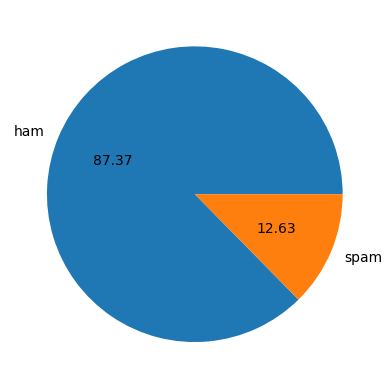

In [28]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [29]:
# From above we can conclude that our data is imbalanced

In [30]:
import nltk

In [31]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# number of alphabets
df["num_alphabets"] = df["text"].apply(len)

In [33]:
df.head()

,target,text,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df["text"][1]

'Ok lar... Joking wif u oni...'

In [35]:
# number of words
df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [36]:
nltk.word_tokenize(df["text"][1])

['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']

In [37]:
len(nltk.word_tokenize(df["text"][1]))

8

In [38]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_alphabets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
# number of sentenses
df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [41]:
df["text"][1]

'Ok lar... Joking wif u oni...'

In [42]:
nltk.sent_tokenize(df["text"][1])

['Ok lar...', 'Joking wif u oni...']

In [43]:
len(nltk.sent_tokenize(df["text"][1]))

2

In [44]:
df["num_sentenses"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_alphabets,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
#df.drop(columns=["num_sent"], inplace=True)

In [48]:
df.head()

,target,text,num_alphabets,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[["num_alphabets", "num_words", "num_sentenses"]].describe()

,num_alphabets,num_words,num_sentenses
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# checking only for ham

In [51]:
df[df["target"] == 0][["num_alphabets", "num_words", "num_sentenses"]].describe()

,num_alphabets,num_words,num_sentenses
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
# checking for spam
df[df["target"] == 1][["num_alphabets", "num_words", "num_sentenses"]].describe()

,num_alphabets,num_words,num_sentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [53]:
import seaborn as sns

In [54]:
df[df["target"] == 0]["num_alphabets"]

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_alphabets, Length: 4516, dtype: int64

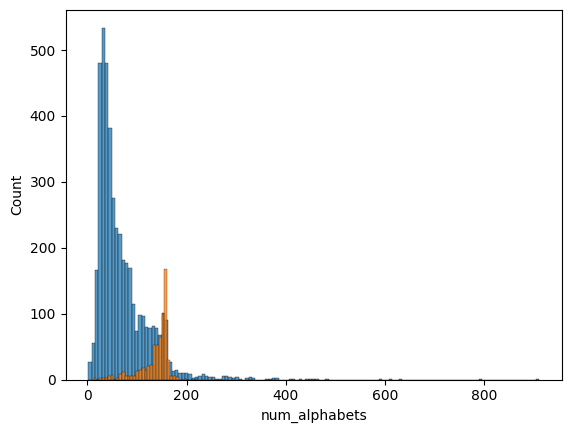

In [55]:
sns.histplot(df[df["target"] == 0]["num_alphabets"])
sns.histplot(df[df["target"] == 1]["num_alphabets"])
plt.show()

In [56]:
# from above we can conclude that spam sms has more length than ham sms

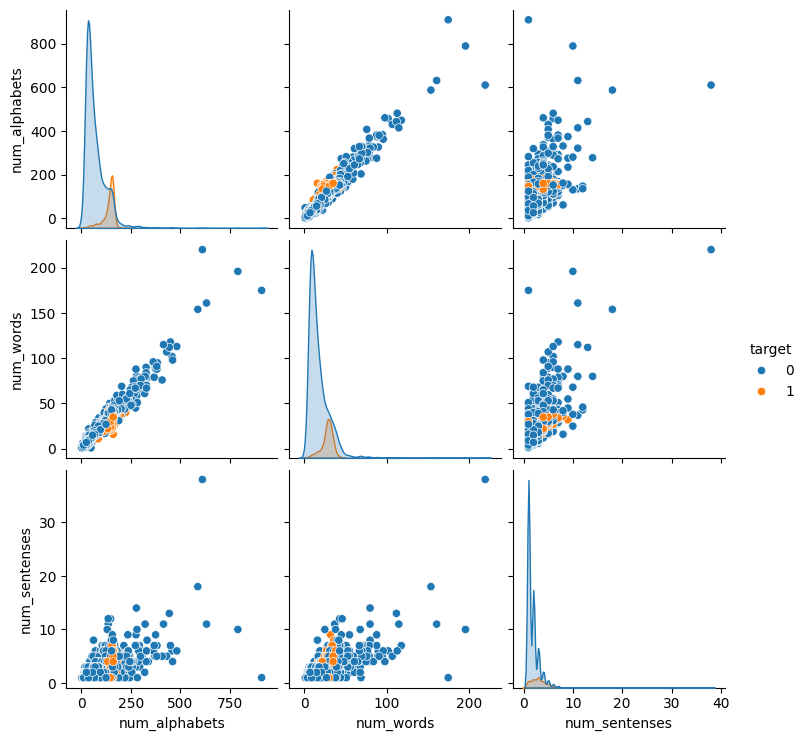

In [57]:
sns.pairplot(df, hue="target")

In [58]:
df[["target", "num_alphabets", "num_words", "num_sentenses"]].corr()

,target,num_alphabets,num_words,num_sentenses
target,1.000000,0.384717,0.262912,0.263939
num_alphabets,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentenses,0.263939,0.624139,0.679971,1.000000


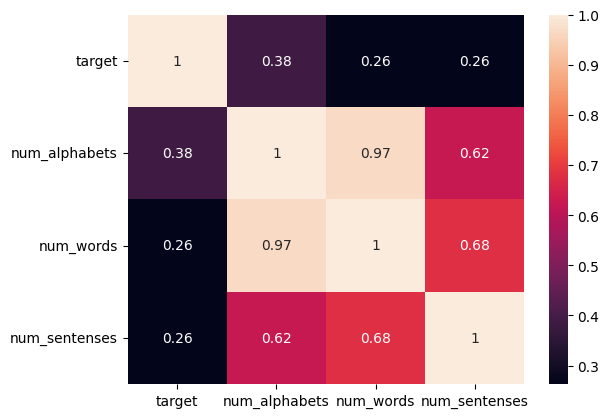

In [59]:
sns.heatmap(df[["target", "num_alphabets", "num_words", "num_sentenses"]].corr(), annot=True)
plt.show()

In [89]:
# from above we can conclude that we can keep only one column for model building and that is num_alphabets becuase
# it has more correlation with target column than others

## Data Preprocessing
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- stemming

In [61]:
from nltk.corpus import stopwords

In [62]:
# stopwords are those words which dont help in the meaning of the sentense these words only help in the formation of the sentense
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [63]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [65]:
ps.stem("loving")

'love'

In [66]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("English") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [67]:
transformed_text("Hi HOW are YOU ajay 20% age$%& loved dancing")

'hi ajay 20 age love danc'

In [68]:
transformed_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [69]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [70]:
df["text"].apply(transformed_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [71]:
df["transformed_text"] = df["text"].apply(transformed_text)

In [72]:
df.head()

,target,text,num_alphabets,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
from wordcloud import WordCloud

In [74]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")
wc1 = WordCloud(width=500, height=500, min_font_size=10, background_color="black")

In [75]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep = " "))
ham_wc = wc1.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep = " "))

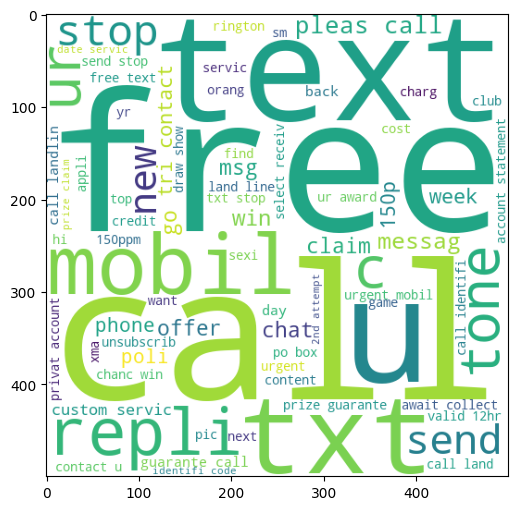

In [76]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

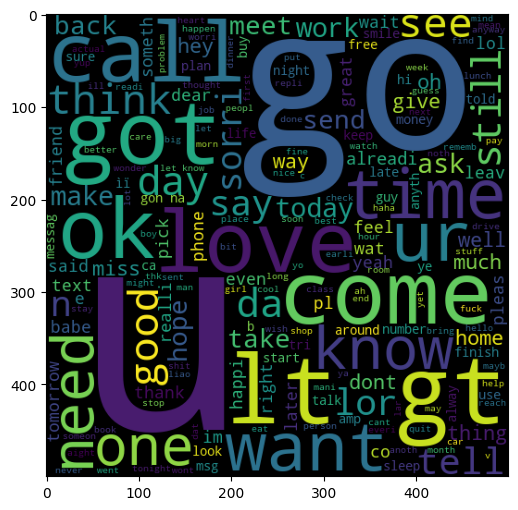

In [77]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [78]:
df.head()

,target,text,num_alphabets,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [80]:
len(spam_corpus)

9939

In [81]:
from collections import Counter

In [82]:
Counter(spam_corpus).most_common(20)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57)]

In [83]:
most_com = pd.DataFrame(Counter(spam_corpus).most_common(20))
most_com

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


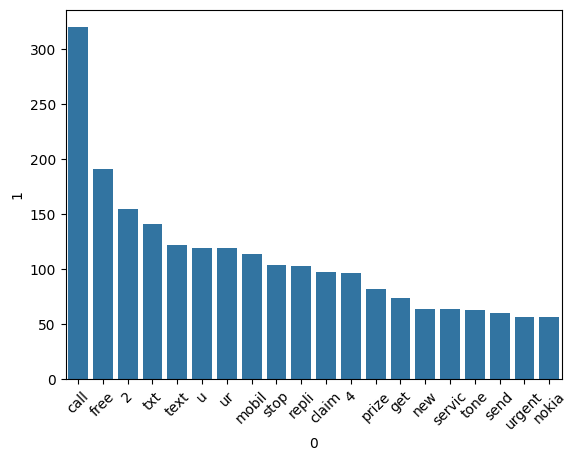

In [84]:
sns.barplot(most_com, x = 0, y = 1)
plt.xticks(rotation = 45)
plt.show()

In [85]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [86]:
len(ham_corpus)

35404

In [87]:
most_com1= pd.DataFrame(Counter(ham_corpus).most_common(20))
most_com1

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


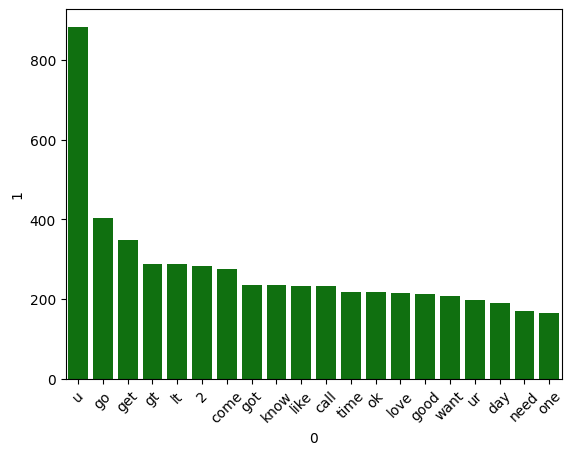

In [88]:
sns.barplot(most_com1, x = 0, y = 1, color="green")
plt.xticks(rotation = 45)
plt.show()

## Model Building

In [90]:
df.head()

,target,text,num_alphabets,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
# we will use target column and transformed_text column for model building

In [109]:
# for that we will convert the transformed text into vector(numbers)
# we use bag of words (CountVectorizer)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
cv = CountVectorizer()

In [97]:
X = cv.fit_transform(df["transformed_text"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
y = df["target"].values
y 

array([0, 0, 1, ..., 0, 0, 0])

In [100]:
X.shape

(5169, 6708)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [104]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8752417794970987
[[801 115]
 [ 14 104]]
0.4748858447488584


In [107]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9777562862669246
[[902  14]
 [  9 109]]
0.8861788617886179


In [108]:
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.97678916827853
[[915   1]
 [ 23  95]]
0.9895833333333334


In [110]:
# we will try with tfidf vectorizer

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()

# appending the num_alphabets to X 
#X = np.hstack((X, df["num_alphabets"].values.reshape(-1, 1)))

y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8713733075435203
[[801 115]
 [ 18 100]]
0.46511627906976744
0.9816247582205029
[[916   0]
 [ 19  99]]
1.0
0.9874274661508704
[[915   1]
 [ 12 106]]
0.9906542056074766


In [212]:
X.shape

(5169, 3000)

In [213]:
# we need high precision in this model rather than high accuracy
# by using "tfidf with Multinomial naive bayes" we can see that we have accuracy of 96.5 with precision score 1.0 

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [215]:
lr = LogisticRegression(solver="liblinear", penalty="l1")
svc = SVC(kernel="sigmoid", gamma=1.0)
nb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=23)
abc = AdaBoostClassifier(n_estimators=50, random_state=23)
bag = BaggingClassifier(n_estimators=50, random_state=23)
etc = ExtraTreesClassifier(n_estimators=50, random_state=23)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=23)
xgb = XGBClassifier(n_estimators=50, random_state=23)

In [216]:
clfs = {
    "LR" : lr,
    "SVC" : svc,
    "NB" : nb,
    "DT" : dt,
    "KNN" : knn,
    "RF" : rfc,
    "ABC" : abc,
    "BAG" : bag,
    "ETC" : etc,
    "GB" : gbdt,
    "XGB" : xgb
}

In [217]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [218]:
train_classifier(rfc, X_train, y_train, X_test, y_test)

(0.9787234042553191, 0.98)

In [219]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuarcy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy: ", current_accuarcy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuarcy)
    precision_scores.append(current_precision)

For  LR
Accuracy:  0.9564796905222437
Precision:  0.8924731182795699
For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9514563106796117
For  NB
Accuracy:  0.9816247582205029
Precision:  1.0
For  DT
Accuracy:  0.9448742746615088
Precision:  0.8080808080808081
For  KNN
Accuracy:  0.9177949709864603
Precision:  0.9459459459459459
For  RF
Accuracy:  0.9787234042553191
Precision:  0.98


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  ABC
Accuracy:  0.9632495164410058
Precision:  0.8773584905660378
For  BAG
Accuracy:  0.9661508704061895
Precision:  0.8547008547008547
For  ETC
Accuracy:  0.9854932301740812
Precision:  0.9813084112149533
For  GB
Accuracy:  0.9613152804642167
Precision:  0.9333333333333333
For  XGB
Accuracy:  0.9758220502901354
Precision:  0.9514563106796117


In [133]:
all_df = pd.DataFrame({"Algorithm" : clfs.keys(), "Accuracy" : accuracy_scores, "Precision" : precision_scores}).sort_values("Precision", ascending=False)

In [134]:
all_df

,Algorithm,Accuracy,Precision
2,NB,0.965184,1.000000
4,KNN,0.910058,1.000000
5,RF,0.980658,1.000000
8,ETC,0.975822,0.979381
1,SVC,0.972921,0.959184
10,XGB,0.971954,0.923810
9,GB,0.957447,0.911111
6,ABC,0.967118,0.896226
0,LR,0.954545,0.890110
7,BAG,0.968085,0.863248


In [142]:
all_df1 = pd.melt(all_df, id_vars="Algorithm")
all_df1

,Algorithm,variable,value
0,NB,Accuracy,0.965184
1,KNN,Accuracy,0.910058
2,RF,Accuracy,0.980658
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,XGB,Accuracy,0.971954
6,GB,Accuracy,0.957447
7,ABC,Accuracy,0.967118
8,LR,Accuracy,0.954545
9,BAG,Accuracy,0.968085


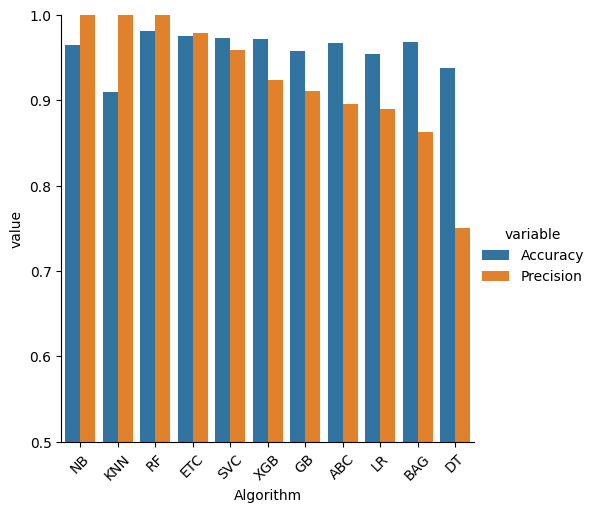

In [143]:
sns.catplot(data= all_df1, x = "Algorithm", y = "value", hue="variable", kind="bar", height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=45)
plt.show()

In [144]:
# from above we can clearly observe that RF(random forest) performs really well for both precision and accuracy.

## Model Improvement

In [184]:
temp_df1 = pd.DataFrame({"Algorithm" : clfs.keys(), "Accuracy_max_ft_3000" : accuracy_scores, "Precision_max_ft_3000" : precision_scores}).sort_values("Precision_max_ft_3000", ascending=False)

In [185]:
temp_df

,Algorithm,Accuracy_num_alpha,Precision_num_alpha
2,NB,0.946809,1.000000
5,RF,0.974855,0.979167
8,ETC,0.983559,0.971963
10,XGB,0.971954,0.932039
0,LR,0.959381,0.895833
9,GB,0.954545,0.890110
6,ABC,0.965184,0.866071
3,DT,0.952611,0.863158
7,BAG,0.965184,0.853448
4,KNN,0.925532,0.688073


In [187]:
temp_df = temp_df.merge(temp_df1, on="Algorithm")
temp_df

,Algorithm,Accuracy_num_alpha,Precision_num_alpha,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.946809,1.000000,0.981625,1.000000
1,RF,0.974855,0.979167,0.978723,0.980000
2,ETC,0.983559,0.971963,0.985493,0.981308
3,XGB,0.971954,0.932039,0.975822,0.951456
4,LR,0.959381,0.895833,0.956480,0.892473
5,GB,0.954545,0.890110,0.961315,0.933333
6,ABC,0.965184,0.866071,0.963250,0.877358
7,DT,0.952611,0.863158,0.944874,0.808081
8,BAG,0.965184,0.853448,0.966151,0.854701
9,KNN,0.925532,0.688073,0.917795,0.945946


In [189]:
all_df = all_df.merge(temp_df, on="Algorithm")
all_df

,Algorithm,Accuracy,Precision,Accuracy_num_alpha,Precision_num_alpha,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.965184,1.000000,0.946809,1.000000,0.981625,1.000000
1,KNN,0.910058,1.000000,0.925532,0.688073,0.917795,0.945946
2,RF,0.980658,1.000000,0.974855,0.979167,0.978723,0.980000
3,ETC,0.975822,0.979381,0.983559,0.971963,0.985493,0.981308
4,SVC,0.972921,0.959184,0.885880,0.000000,0.975822,0.951456
5,XGB,0.971954,0.923810,0.971954,0.932039,0.975822,0.951456
6,GB,0.957447,0.911111,0.954545,0.890110,0.961315,0.933333
7,ABC,0.967118,0.896226,0.965184,0.866071,0.963250,0.877358
8,LR,0.954545,0.890110,0.959381,0.895833,0.956480,0.892473
9,BAG,0.968085,0.863248,0.965184,0.853448,0.966151,0.854701


In [158]:
# with the change in max_features we can see that Naive bayes performance improves batter accuracy than RF(98.06) NB(98.16)

In [159]:
# By adding the num_alphabets feature 

In [191]:
# Now lets try Voting classifier and stacking

In [220]:
from sklearn.ensemble import VotingClassifier

In [221]:
vc = VotingClassifier(estimators=[("NB", nb), ("RF", rfc), ("etc", etc), ("xgb", xgb)], voting = "soft")

In [222]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('NB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=23)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=23)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            en...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=23, ...))],
                 voting='soft')

In [223]:
y_pred = vc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.9835589941972921
Precision:  1.0


In [224]:
# applying stacking
estimators=[("NB", nb), ("RF", rfc), ("etc", etc), ("xgb", xgb)]
final_estimator = RandomForestClassifier()

In [225]:
from sklearn.ensemble import StackingClassifier

In [226]:
stc = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [227]:
stc.fit(X_train, y_train)

StackingClassifier(estimators=[('NB', MultinomialNB()),
                               ('RF',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=23)),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=23)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=23, ...))],
                   final_estimator=RandomForestClassifier())

In [228]:
y_pred = stc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.9874274661508704
Precision:  0.9565217391304348


In [229]:
# from all above we can observe that voting classifier performs well with accuracy of 98.35 and precision of 100

In [230]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(vc, open("model.pkl", "wb"))